In [1]:
from table_creations import *
import requests
from credentials import config
from authentication import get_token
import pandas as pd
import time

In [2]:
from cassandra.cluster import Cluster
cluster = Cluster(['localhost'], port=9042)
session = cluster.connect() #Kan vel være et argument til funksjonen? Tenkte på dette

In [3]:
create_keyspace(session, keyspace='fish_data')
reset_table(session, keyspace='fish_space', table_name='localities')

In [4]:
create_locality_table(session)

In [5]:
#print all keyspace name and table names within keyspaces from session
#mute the output

spark = initiate_spark()

your 131072x1 screen size is bogus. expect trouble
23/11/28 12:56:39 WARN Utils: Your hostname, Ivars-PC resolves to a loopback address: 127.0.1.1; using 172.23.6.83 instead (on interface eth0)
23/11/28 12:56:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


KeyboardInterrupt: 

:: loading settings :: url = jar:file:/home/ivholmlu/.local/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/ivholmlu/.ivy2/cache
The jars for the packages stored in: /home/ivholmlu/.ivy2/jars
com.datastax.spark#spark-cassandra-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-e070b1b6-d0a5-48b8-b154-d1b1fca18b45;1.0
	confs: [default]
	found com.datastax.spark#spark-cassandra-connector_2.12;3.4.1 in central
	found com.datastax.spark#spark-cassandra-connector-driver_2.12;3.4.1 in central
	found org.scala-lang.modules#scala-collection-compat_2.12;2.11.0 in central
	found com.datastax.oss#java-driver-core-shaded;4.13.0 in central
	found com.datastax.oss#native-protocol;1.5.0 in central
	found com.datastax.oss#java-driver-shaded-guava;25.1-jre-graal-sub-1 in central
	found com.typesafe#config;1.4.1 in central
	found org.slf4j#slf4j-api;1.7.26 in central
	found io.dropwizard.metrics#metrics-core;4.1.18 in central
	found org.hdrhistogram#HdrHistogram;2.1.12 in central
	found org.reactivestreams#reactive-streams;1.0

In [1]:
from api_creations import *
df = api_weather_station_id(id = "SN65310", year="2022")
df.head()


,mean(air_temperature P1D),mean(wind_speed P1D),mean(relative_humidity P1D),week,year,referenceTime,sourceId
0,4.6,6.4,72,0,2022,2022-01-01T00:00:00.000Z,SN65310:0
0,4.0,10.2,86,0,2022,2022-01-02T00:00:00.000Z,SN65310:0
0,6.3,7.0,90,1,2022,2022-01-03T00:00:00.000Z,SN65310:0
0,3.3,6.6,77,1,2022,2022-01-04T00:00:00.000Z,SN65310:0
0,1.1,8.7,78,1,2022,2022-01-05T00:00:00.000Z,SN65310:0


<Axes: xlabel='week'>

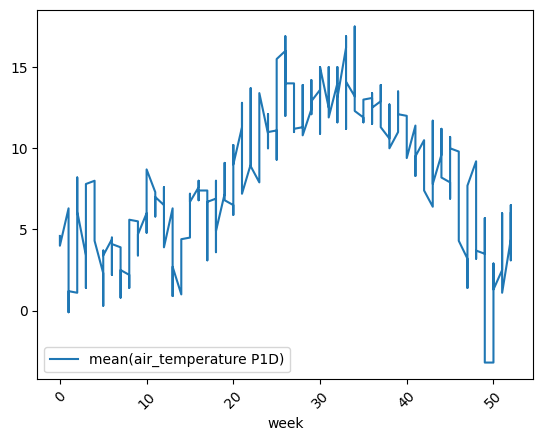

In [6]:
#set referencetime as index
#df.set_index("referenceTime", inplace=True)
df.plot(x="week", y = "mean(air_temperature P1D)", rot=45)

In [12]:
#Pivot the table on week with mean as function
pivot_table = df.pivot_table(columns='week', values=['mean(air_temperature P1D)'], aggfunc="mean")
print(pivot_table)

TypeError: agg function failed [how->mean,dtype->object]

In [11]:
pivot_table.head()

mean(air_temperature P1D)                           \
week                                            0    1   2   3   4   5   6    
referenceTime                                                                 
2022-01-01T00:00:00.000Z                       4.6  NaN NaN NaN NaN NaN NaN   
2022-01-02T00:00:00.000Z                       4.0  NaN NaN NaN NaN NaN NaN   
2022-01-03T00:00:00.000Z                       NaN  6.3 NaN NaN NaN NaN NaN   
2022-01-04T00:00:00.000Z                       NaN  3.3 NaN NaN NaN NaN NaN   
2022-01-05T00:00:00.000Z                       NaN  1.1 NaN NaN NaN NaN NaN   

                                      ...                                      \
week                      7   8   9   ...  43  44  45  46  47  48  49  50  51   
referenceTime                         ...                                       
2022-01-01T00:00:00.000Z NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2022-01-02T00:00:00.000Z NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2022-01-03T00:00:00.000Z NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2022-01-04T00:00:00.000Z NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2022-01-05T00:00:00.000Z NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   

                              
week                      52  
referenceTime                 
2022-01-01T00:00:00.000Z NaN  
2022-01-02T00:00:00.000Z NaN  
2022-01-03T00:00:00.000Z NaN  
2022-01-04T00:00:00.000Z NaN  
2022-01-05T00:00:00.000Z NaN  

[5 rows x 53 columns]

In [ ]:
obs_data = [{'elementId': 'mean(air_temperature P1D)', 'value': 4.7, 'unit': 'degC', 'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2}, 'timeOffset': 'PT0H', 'timeResolution': 'P1D', 'timeSeriesId': 0, 'performanceCategory': 'C', 'exposureCategory': '2', 'qualityCode': 0}, {'elementId': 'mean(air_temperature P1D)', 'value': 6, 'unit': 'degC', 'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2}, 'timeOffset': 'PT6H', 'timeResolution': 'P1D', 'timeSeriesId': 0, 'performanceCategory': 'C', 'exposureCategory': '2'}, {'elementId': 'mean(wind_speed P1D)', 'value': 12.4, 'unit': 'm/s', 'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 10}, 'timeOffset': 'PT0H', 'timeResolution': 'P1D', 'timeSeriesId': 0, 'performanceCategory': 'C', 'exposureCategory': '2', 'qualityCode': 2}, {'elementId': 'mean(relative_humidity P1D)', 'value': 75, 'unit': 'percent', 'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2}, 'timeOffset': 'PT0H', 'timeResolution': 'P1D', 'timeSeriesId': 0, 'performanceCategory': 'C', 'exposureCategory': '2'}]

# Transform the list into a dictionary with 'elementId' as keys
row = {}
for item in obs_data:
    key = item.get("elementId")
    value = item.get("value")
    if key is not None:
        row[key] = value
print(transformed_data)

{'mean(air_temperature P1D)': 6, 'mean(wind_speed P1D)': 12.4, 'mean(relative_humidity P1D)': 75}
